# Linear Regression using Gradient Descent

Find a linear relationship between input variable(s) and output

Mathematically,
Given, 
$$X = [x^{(1)} x^{(2)} \ldots x^{(m)}]$$
$$y = [y^{(1)} y^{(2)} \ldots y^{(m)}]$$
and a linear model,
$$\hat{y} = f(X) = \theta^{T}X + b$$
Find parmaters $\theta$ and $b$ such the error between estimated output,$\hat{y}$ and given output,$y$ is minimized.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import animation, rc
from IPython.display import HTML

### Linear Regression Cost Function 

$$\hat{y}^{(j)} = \theta_1 x^{(j)}_1 + \theta_2 x^{(j)}_2 + \ldots + \theta_n x^{(j)}_n + b$$
$$J = \frac{1}{2m} \sum_{j=1}^{m} \left(\hat{y}^{(j)} - y^{(j)}\right)^2$$

#### Vectorization
$$
\begin{align}
\begin{bmatrix} 
\hat{y}^{(1)} & \hat{y}^{(2)} & \ldots  & \hat{y}^{(m)}
\end{bmatrix}
&=
\begin{bmatrix} 
\theta_1 & \theta_2 & \ldots  & \theta_n
\end{bmatrix}
\begin{bmatrix}
x_1^{(1)} & x_1^{(2)} & \ldots & x_1^{(m)} \\
x_2^{(1)} & x_2^{(2)} & \ldots & x_2^{(m)} \\
\vdots & \vdots & \ldots & \vdots \\
x_n^{(1)} & x_n^{(2)} & \ldots & x_n^{(m)} \\
\end{bmatrix}
+ 
\underbrace{\begin{bmatrix} 
b & b & \ldots & b
\end{bmatrix}}_{\text{m times}}
\\
\hat{y} &= \theta^{T}X + b
\end{align}
$$

In [2]:
def computeCost(X, y, theta, b):
    '''
    Computes cost and estimated output for linear regression.
    
        Parameters:
            X (numpy array)    : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)    : 1 x m output row vector
            theta (numpy array): n x 1 parameter column vector
            b (double)         : Bias parameter
        Returns:
            J (double)         : Cost
            y_hat (double)     : Estimated output
    '''
    y_hat = np.dot(theta.T, X) + b
    J = 1/(2*m)*np.sum((y_hat - y)**2)
    return (J, y_hat)

### Gradient Descent for Linear Regression

$$\theta_i := \theta_i - \alpha \frac{\partial J}{\partial \theta_i}$$
$$\begin{align}
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left(\hat{y}^{(j)} - y^{(j)}\right)\frac{\partial \hat{y}^{(j)}}{\partial \theta_i} \\
\frac{\partial J}{\partial \theta_i} &= \frac{1}{m} \sum_{j=1}^{m} \left(\hat{y}^{(j)} - y^{(j)}\right)x_i^{(j)}
\end{align}$$

$$b := b - \alpha \frac{\partial J}{\partial b}$$
$$\begin{align}
\frac{\partial J}{\partial b} &= \frac{1}{m} \sum_{j=1}^{m} \left(\hat{y}^{(j)} - y^{(j)}\right)\frac{\partial \hat{y}^{(j)}}{\partial b} \\
\frac{\partial J}{\partial b} &= \frac{1}{m} \sum_{j=1}^{m} \left(\hat{y}^{(j)} - y^{(j)}\right)
\end{align}$$

#### Vectorization of Gradient Descent for Linear Regression
$$
\begin{align}
\begin{bmatrix} 
\frac{\partial J}{\partial \theta_1} \\ \frac{\partial J}{\partial \theta_2} \\ \vdots  \\ \frac{\partial J}{\partial \theta_n}
\end{bmatrix}
&=
\frac{1}{m}
\begin{bmatrix}
x_1^{(1)} & x_1^{(2)} & \ldots & x_1^{(m)} \\
x_2^{(1)} & x_2^{(2)} & \ldots & x_2^{(m)} \\
\vdots & \vdots & \ldots & \vdots \\
x_n^{(1)} & x_n^{(2)} & \ldots & x_n^{(m)} \\
\end{bmatrix}
\begin{bmatrix} 
\hat{y}^{(1)} - y^{(1)} \\ \hat{y}^{(2)} - y^{(2)} \\ \vdots  \\ \hat{y}^{(m)} - y^{(m)}
\end{bmatrix}
\\
D\theta &= \frac{1}{m} X(\hat{y}-y)^T
\end{align}
$$

$$\theta := \theta - \alpha D\theta$$

In [3]:
def gradientDescent(X, y, theta, b, alpha, n_iterations):
    """
    Performs gradient descent for number of iterations
    
        Parameters:
            X (numpy array)    : n x m input features matrix (n: number of parameters, m: number of examples)
            y (numpy array)    : 1 x m output row vector
            theta (numpy array): n x 1 parameter column vector
            b (double)         : Bias parameter
            alpha (double)     : Learning rate (Hyperparameter)
            n_iterations       : No. of iterations (Hyperparamter)
        Returns:
            theta (numpy array)    : Modified n x 1 parameter column vector
            b (double)             : Modified bias parameter
            J_iterations (list)    : Cost over n_iterations 
            theta_iterations (list): Variation of parameter theta over n_iterations 
            b_iterations (list)    : Variation of parameter b over n_iterations 
    """
    J_iterations = []
    theta_iterations = []
    b_iterations = []
    y_hat = np.dot(theta.T, X) + b
    for k in range(n_iterations):
        # Calculate gradients
        D_theta = 1/m * np.dot(X, (y_hat-y).T)
        db = 1/m * np.sum(y_hat-y)
        
        # Update parameters
        theta = theta - alpha*D_theta
        b = b - alpha*db
        
        # Compute cost and estimated value
        J, y_hat = computeCost(X, y, theta, b)
        J_iterations.append(J)
        theta_iterations.append(theta)
        b_iterations.append(b)
        
        # Print cost every 100 iteration
        if k % 100 == 0:
            print("Iteration #"+str(k+1), "| Cost:", J)
    print("Iteration #"+str(k+1), "| Cost:", J)
    
    return (theta, b, J_iterations, theta_iterations, b_iterations)

## One Dimensional Linear Regresssion

In [4]:
def plotData(x, y):
    '''
    Plots population of city v/s profit. 
    
        Parameters:
            x (list or numpy array): Population in 10,000s
            y (list or numpy array): Profit in $10,000s
        Returns:
            None
    '''
    plt.plot(x, y, 'rx', markersize=10)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')

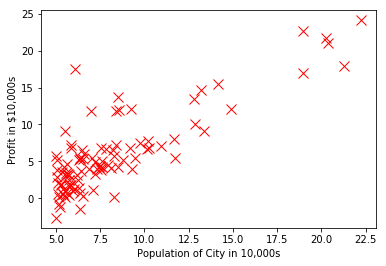

In [5]:
# Load and preprocess data
data = np.genfromtxt('data1.csv', delimiter=',')
m, n = data.shape
n = n-1
X = data[:,0].reshape((n,m))
y = data[:,1].reshape((1,m))

plotData(X,y)

In [6]:
# Initialize parameters
theta = np.zeros((n,1))
b = 0.

In [7]:
# Set hyperparameters
alpha = 0.01
n_iterations = 1500

# Run gradient descent
theta, b, J_iterations, theta_iterations, b_iterations = gradientDescent(X, y, theta, b, alpha, n_iterations)

Iteration #1 | Cost: 6.737190464870009
Iteration #101 | Cost: 5.476362817272741
Iteration #201 | Cost: 5.173634551165021
Iteration #301 | Cost: 4.962606493117519
Iteration #401 | Cost: 4.8155014941166865
Iteration #501 | Cost: 4.712956453749759
Iteration #601 | Cost: 4.6414735988143185
Iteration #701 | Cost: 4.591643801766726
Iteration #801 | Cost: 4.556908078409751
Iteration #901 | Cost: 4.532694243543436
Iteration #1001 | Cost: 4.515815084502823
Iteration #1101 | Cost: 4.50404883551784
Iteration #1201 | Cost: 4.495846731678219
Iteration #1301 | Cost: 4.490129148489064
Iteration #1401 | Cost: 4.4861434933249615
Iteration #1500 | Cost: 4.483388256587725


Text(0.5,0,'Iteration')

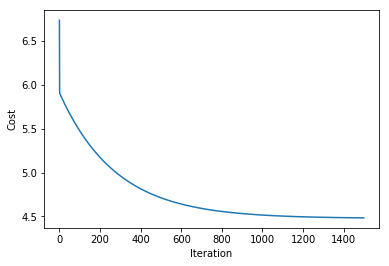

In [8]:
plt.plot(J_iterations)
plt.ylabel("Cost")
plt.xlabel("Iteration")

theta: 1.166362350335582 
b: -3.6302914394043597


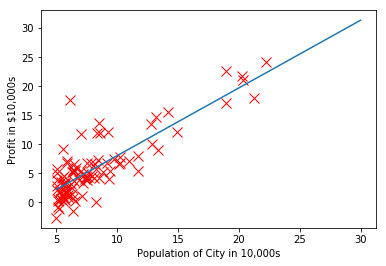

In [9]:
print("theta:", theta.squeeze(), "\nb:", b)

X_pred = np.linspace(5, 30, 100).reshape(1,100)
y_pred = np.dot(theta.T, X_pred) + b

plt.figure()
plotData(X,y)
plt.plot(X_pred.T, y_pred.T)

### Animate Parameters $\theta$ and $b$

In [10]:
X_pred = np.linspace(5, 30, 100).reshape(1,100)
def animate(i):
    slope = theta_iterations[i]
    c = b_iterations[i]
    y_pred = np.dot(slope.T, X_pred) + c
    line.set_data(X_pred, y_pred)
    return (line,)

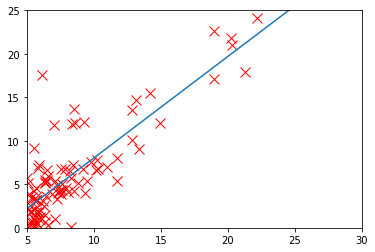

In [11]:
fig, ax = plt.subplots()

ax.set_xlim((5, 30))
ax.set_ylim((0, 25))

ax.plot(X, y, 'rx', markersize=10)
line, = ax.plot([], [])

anim = animation.FuncAnimation(fig, animate, frames=1499, interval=20, blit=True)
HTML(anim.to_html5_video())